## NEURON

array([ 7.70613922e-04,  7.70613922e-04,  3.85306961e-05,  2.56871307e-04,
        2.56871307e-05,  2.56871307e-06,  2.56871307e-05, -7.00000000e+01,
        1.00000000e+00,  1.50000000e+00])
soma { nseg=1  L=11.1318  Ra=100
	/*location 0 attached to cell 0*/
	/* First segment only */
	insert morphology { diam=11.1318}
	insert capacitance { cm=1.5}
}
Changed dt
Changed dt
Changed dt


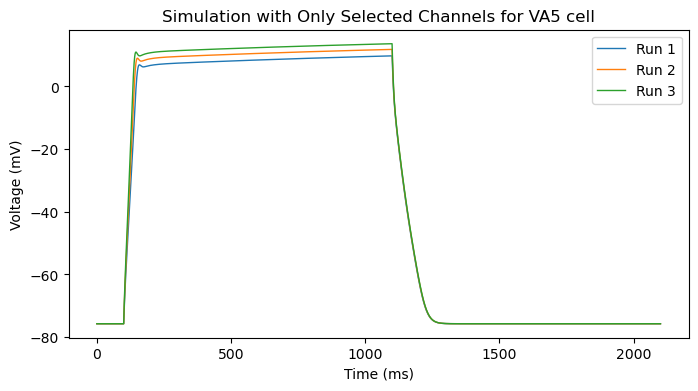

In [3]:

import sys
sys.path.append('..')  # the parent directory
from VA5_simulation_iclamp import VA5_simulation_iclamp
from g_to_Scm2 import gScm2
import pprint


surf=389.3e-8 

# CONDUCTANCES: slo2egl19,slo2iso,EGL19,irk,shk1,nca,leak,eleak,c2,cm
g0=[3,3,0.15,1,0.1,0.01,0.1,-70,1,1.5]






    
gVA5_scaled = gScm2(g0,surf,6)
pprint.pprint(gVA5_scaled)

        


v, time1 = VA5_simulation_iclamp(gVA5_scaled, s1=0.015, s2=0.019, ns=3)
#s2 = 0.035
# best_cc=AIY_simulation_iclamp(gbest,-0.015,0.035,11)
# best_voltage=best_cc[0]
# best_time2=best_cc[1]
# best_VIss=best_cc[3]
# best_VIpeaks=best_cc[2]



# #Matplotlib


import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))


for i in range(len(v)):
    plt.plot(time1[i], v[i], label=f'Run {i + 1}', linewidth=1)


plt.title('Simulation with Only Selected Channels for VA5 cell')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')


plt.legend()
plt.show()





#Plotly
# # Plotting
# import plotly.graph_objects as go

# fig = go.Figure()
# for i in range(len(v)):
#     fig.add_trace(
#         go.Scatter(
#             x=time1[i], 
#             y=v[i], 
#             mode='lines', 
#             name=f'Run {i + 1}'  # Label each run
#         )
#     )
# fig.update_layout(
#     title='Simulation with Only ___ Channel',
#     xaxis_title='Time (ms)',
#     yaxis_title='Voltage (mV)',
#     template='plotly_white' ,
#     width = 800,
#     height = 400
# )
# fig.show()


## NeuroML

In [ ]:
import pandas as pd
from pyneuroml import pynml

def run_simulation_and_get_results(lems_file):
    # Run the simulation with pyNeuroML
    print(f"Running simulation: {lems_file}")
    results = pynml.run_lems_with_jneuroml(
        lems_file, 
        max_memory="1024M", 
        nogui=True, 
        plot=False, 
        load_saved_data=True
    )

    # time and variable values
    time = results["t"]
    voltage_data = {}
    for key in results:
        if key.startswith("pop_VA5") and key.endswith("/v"):  # Filter voltage keys
            compartment = key.split("/")[1]  # Extract compartment index
            voltage_data[f"Run {compartment}"] = results[key]
    
    
    df = pd.DataFrame(voltage_data)
    df.insert(0, "Time (ms)", time)  # Add time as the first column
    return df


lems_file = "LEMS_Sim_IClamp_VA5.xml" 
df_VA5_NML = run_simulation_and_get_results(lems_file)
df_VA5_NML = df_VA5_NML * 1000 # Convert voltage from V to mV and time from s to ms
nml_time = df_VA5_NML.iloc[:, 0]
nml_voltages = df_VA5_NML.iloc[:, 1:4]

In [ ]:
#matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# NEURON simulation data
for i in range(len(v)):
    plt.plot(time1[i], v[i], label=f'NEURON Run {i + 1}', linewidth=2, color='blue')

# NeuroML data
for col in nml_voltages.columns:
    plt.plot(nml_time, df_VA5_NML[col], label=f'NeuroML {col}', linewidth=1, color='red', linestyle='--')


plt.title('Comparison: NEURON Simulation vs NeuroML Data')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')

plt.legend(loc='upper right')

plt.show()


In [ ]:
# # PLOTLY
# import plotly.graph_objects as go

# # # Create the Plotly figure
# fig = go.Figure()

# # Add NEURON simulation data to the plot
# fig = go.Figure()

# for i in range(len(v)):
#     fig.add_trace(
#         go.Scatter(
#             x=time1[i], 
#             y=v[i], 
#             mode='lines', 
#             name=f'NEURON Run {i + 1}', # Label each run
#             line = dict(color = 'blue', width = 2)
#         )
#     )



# # Add NeuroML data to the plot
# for col in nml_voltages.columns:
#     fig.add_trace(
#         go.Scatter(
#             x=nml_time,  # Time from NeuroML data
#             y=df_VA5_NML[col],  # Voltage from NeuroML data
#             mode='lines',
#             name=f'NeuroML {col}',  # Label for each trace
#             line=dict(color='red', dash='dash', width=1)
#         )
#     )

# # Update layout for clarity
# fig.update_layout(
#     title='Comparison: NEURON Simulation vs NeuroML Data',
#     xaxis_title='Time (ms)',
#     yaxis_title='Voltage (mV)',
#     template='plotly_white',
#     legend=dict(x=0.99, y=0.99),  # Adjust legend position
#     height=600,  
#     width=800   
# )

# # Show the plot
# fig.show()